In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# from erddapClient import ERDDAP_Griddap
from netCDF4 import Dataset
import cmocean
from mpl_toolkits.basemap import Basemap
from matplotlib import colors

In [25]:
# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/climate/data/chl/clim_stl_mon_20240831.nc')
ras = file_id.variables["CHL"][:]
lat = file_id.variables["latitude"][:]
lon = file_id.variables["longitude"][:]
file_id.close()

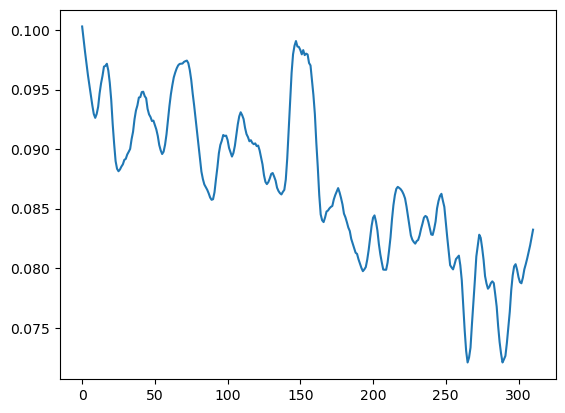

In [29]:
ts = np.mean(ras, axis=(1,2))
plt.plot(ts)

In [18]:
day1 = ras[0]
ras = ras - day1
ras = np.mean(ras, axis=0)

In [19]:
# convert to xarray. 
ras = xr.DataArray(ras, 
                   coords={'x': lat, 'y':lon}, 
                   dims=["x", "y"])
# ras = ras.clip(min = -0.004, max = 0.0075, keep_attrs=False)

<function matplotlib.pyplot.show(close=None, block=None)>

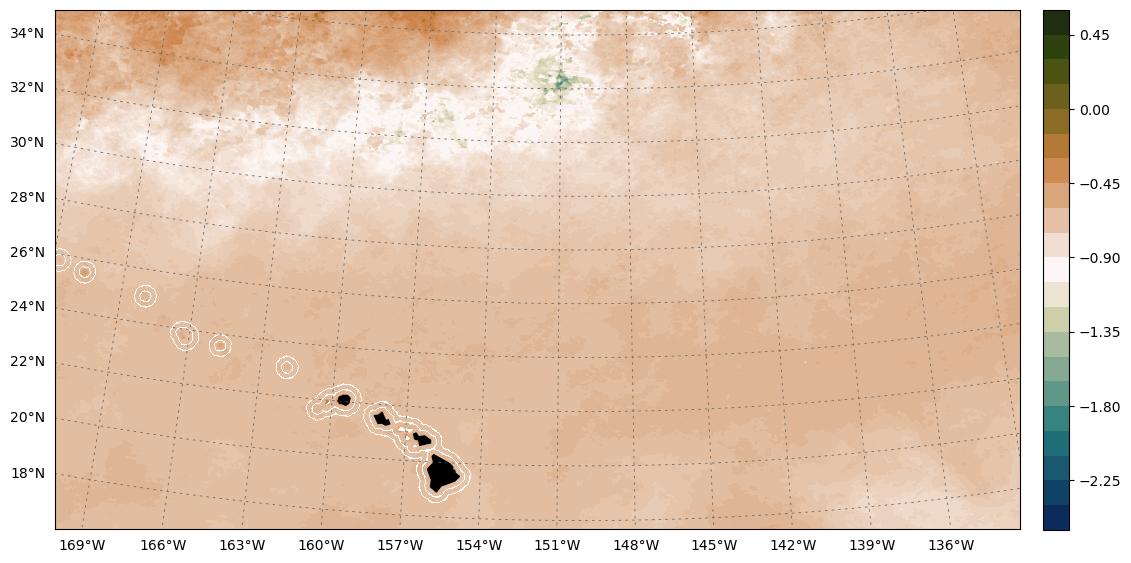

In [21]:
# Calculate the bounds of the data
lon_bounds = [ras.y.min(), ras.y.max()]
lat_bounds = [ras.x.min(), ras.x.max()]

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))
m = Basemap(projection='lcc', resolution='l', 
            llcrnrlat=16, urcrnrlat=35.5, 
            llcrnrlon=-170, urcrnrlon=-130,
            lat_0 = 30, lon_0 = -150,
            width=5.1E6, height=5E6)

# Convert latitude and longitude to map projection coordinates.
x_map, y_map = np.meshgrid(ras.y, ras.x)
x, y = m(x_map, y_map)
# Plot data.
contour = m.contourf(x, y, ras, cmap = cmocean.cm.tarn_r, levels=100, extend='both')
m.fillcontinents(color = 'black')
# Add grid lines
parallels = m.drawparallels(np.arange(18, 40, 2), labels=[1,0,0,0], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5), linewidth = 0.6)
meridians =  m.drawmeridians(np.arange(-175, -130, 3), labels=[0,0,0,1], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5),linewidth = 0.6)
# Draw parallels and meridians with customized gridline alpha and label colors
m.drawcoastlines(color='black')
# add colorbar.
c = ax1.contourf(ras.y, ras.x, ras, levels = 20, cmap = cmocean.cm.tarn_r) 
cbar = fig.colorbar(c, shrink = 0.965, pad = 0.02)
plt.show